In [1]:

import os
import sys
import random
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from itertools import product
from sklearn.preprocessing import RobustScaler, LabelEncoder

sys.path.extend([
                '../src',
                '../data',
                ])

from utils import run_nested_cv_3b

if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("CPU")
    
seed_num = 42
random.seed(seed_num)
np.random.seed(seed_num)
tf.random.set_seed(seed_num)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

#data
left = pd.read_csv('../data/left.csv')
right = pd.read_csv('../data/right.csv')
affected = pd.read_csv('../data/affected.csv')
unaffected = pd.read_csv('../data/unaffected.csv')

#limb
right['limb'] = 1
left['limb'] = 2
affected['limb'] = 3
unaffected['limb'] = 4

affected['subject'] = affected['subject'] + 10
unaffected['subject'] = unaffected['subject'] + 10

le = LabelEncoder()
right['use_type_encoded'] = le.fit_transform(right['use_type'])
left['use_type_encoded'] = le.fit_transform(left['use_type'])
affected['use_type_encoded'] = le.fit_transform(affected['use_type'])
unaffected['use_type_encoded'] = le.fit_transform(unaffected['use_type'])

combined = pd.concat([unaffected, 
                      affected, 
                      right, 
                      left], ignore_index=True)

architecture = {
                'num_filters': [50, 25],
                'filter_sizes': [5, 5],
                'pool_sizes': [5, 5]
               }

CPU


2025-07-10 11:46:39.211360: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x106a1ce20>, 'kernel_init': <keras.initializers.initializers_v2.GlorotNormal object at 0x106a1ca00>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x169ec15e0>, 'optimizer': 'nadam'} with score: 0.011
New best HP found: {'activation': 'tanh', 'batch_norm': False, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x106a1ce20>, 'kernel_init': <keras.initializers.initializers_v2.GlorotNormal object at 0x106a1ca00>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x169ec15e0>, 'optimizer': 'nadam'} with score: 0.200


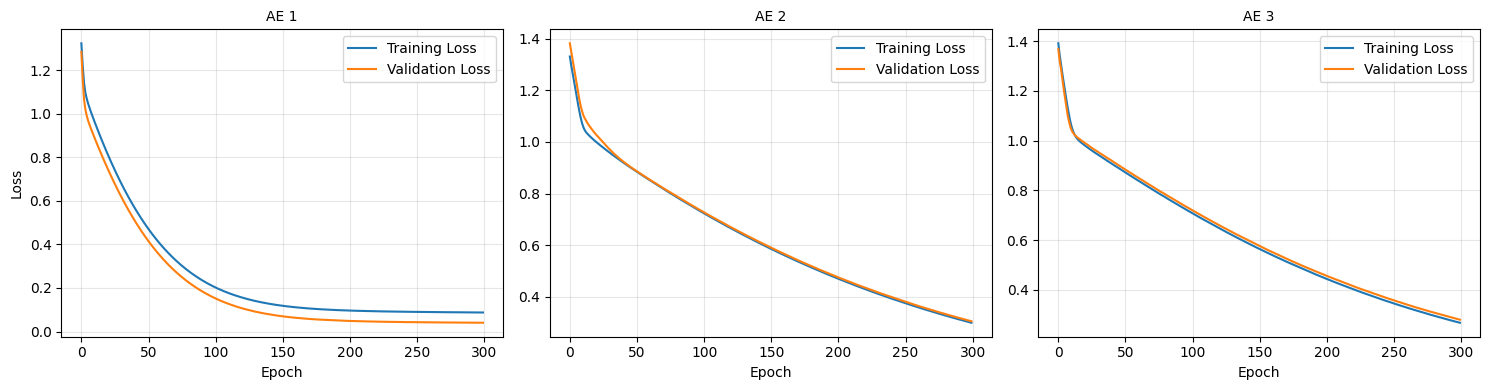

Limb: 4 Subject: 11 Youden Index: 0.5194805194805197 Sensitivity: 0.9285714285714286 Specificity: 0.5909090909090909
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x106a1ce20>, 'kernel_init': <keras.initializers.initializers_v2.GlorotNormal object at 0x106a1ca00>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x169ec15e0>, 'optimizer': 'nadam'} with score: 0.141
New best HP found: {'activation': 'tanh', 'batch_norm': False, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x106a1ce20>, 'kernel_init': <keras.initializers.initializers_v2.GlorotNormal object at 0x106a1ca00>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x169ec15e0>, 'optimizer': 'nadam'} with score: 0.294


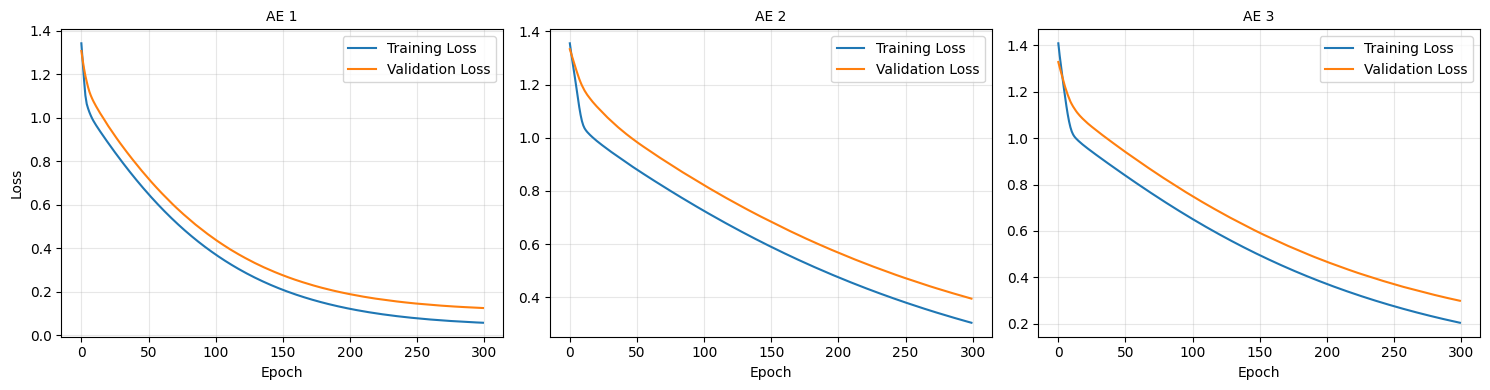

Limb: 4 Subject: 12 Youden Index: 0.3616223585548739 Sensitivity: 0.9171779141104295 Specificity: 0.4444444444444444
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x106a1ce20>, 'kernel_init': <keras.initializers.initializers_v2.GlorotNormal object at 0x106a1ca00>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x169ec15e0>, 'optimizer': 'nadam'} with score: 0.109
New best HP found: {'activation': 'tanh', 'batch_norm': False, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x106a1ce20>, 'kernel_init': <keras.initializers.initializers_v2.GlorotNormal object at 0x106a1ca00>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x169ec15e0>, 'optimizer': 'nadam'} with score: 0.243


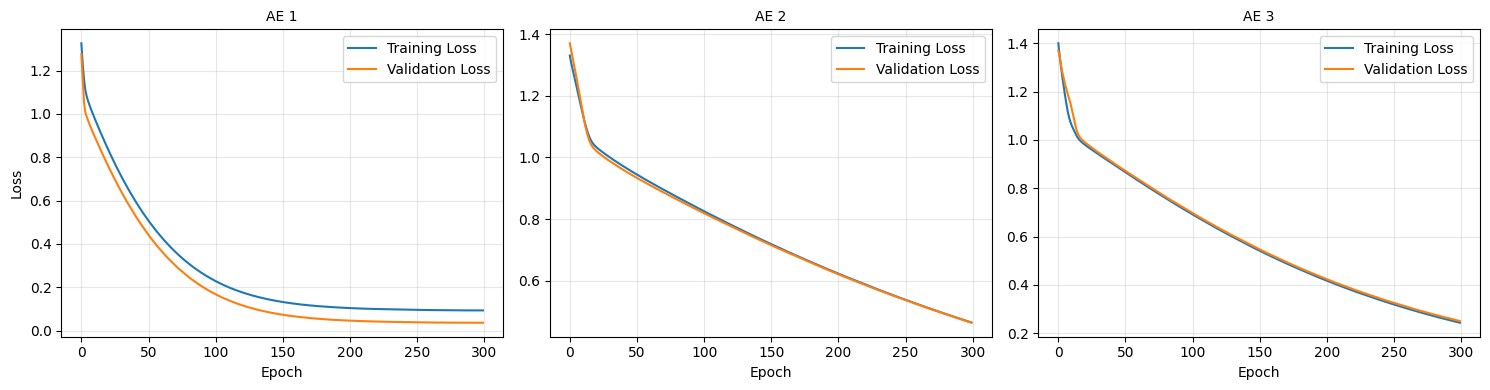

Limb: 4 Subject: 13 Youden Index: 0.1288448393711552 Sensitivity: 0.9924812030075187 Specificity: 0.13636363636363635
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x106a1ce20>, 'kernel_init': <keras.initializers.initializers_v2.GlorotNormal object at 0x106a1ca00>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x169ec15e0>, 'optimizer': 'nadam'} with score: 0.017
New best HP found: {'activation': 'tanh', 'batch_norm': False, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x106a1ce20>, 'kernel_init': <keras.initializers.initializers_v2.GlorotNormal object at 0x106a1ca00>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x169ec15e0>, 'optimizer': 'nadam'} with score: 0.256


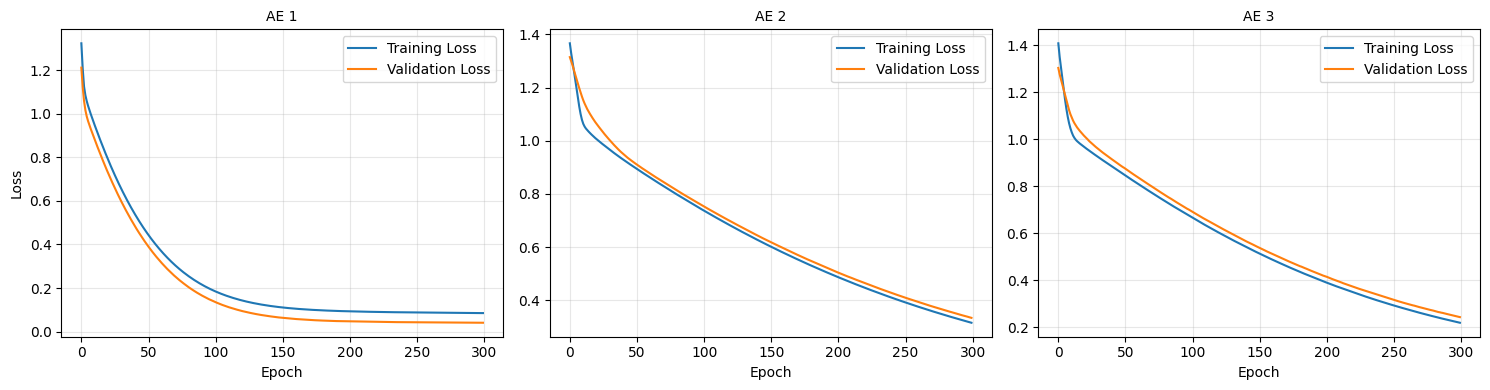

Limb: 4 Subject: 14 Youden Index: 0.19999999999999996 Sensitivity: 1.0 Specificity: 0.2
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x106a1ce20>, 'kernel_init': <keras.initializers.initializers_v2.GlorotNormal object at 0x106a1ca00>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x169ec15e0>, 'optimizer': 'nadam'} with score: 0.058
New best HP found: {'activation': 'tanh', 'batch_norm': False, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x106a1ce20>, 'kernel_init': <keras.initializers.initializers_v2.GlorotNormal object at 0x106a1ca00>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x169ec15e0>, 'optimizer': 'nadam'} with score: 0.403


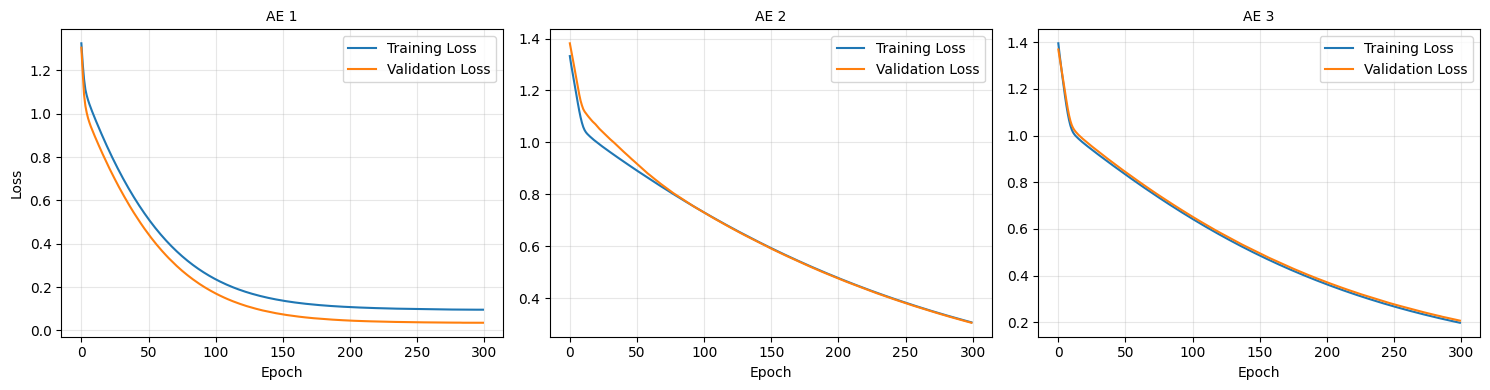

Limb: 4 Subject: 15 Youden Index: 0.14882859787794622 Sensitivity: 0.9337748344370861 Specificity: 0.21505376344086022
0.271755263056899 0.1484096152611499


In [2]:


approach = 3
filename = f'../results/approach3b/limb_nested_cv_unaffected.csv'

window_size = 100
epochs = 300
batch_size = 32
class_loss = False
plot_hist = False

error_func = 'mae'

X = unaffected[['ax', 'ay', 'az']]
y = unaffected['gnd']
subjects = unaffected['subject']
limbs = unaffected['limb']
usetypes = unaffected['use_type_encoded']

hp = {
    'activation': ['tanh'],
    'kernel_init': [tf.keras.initializers.GlorotNormal(seed=42), ],           
    'bias_init': [tf.keras.initializers.Zeros()],
    'optimizer': ['nadam'],
    'loss': [tf.keras.losses.mean_squared_error, ],     
    'learning_rate': [0.0001],
    'batch_norm': [True, False]
    }

results_3b = run_nested_cv_3b(window_size,             
                              X=X,                         
                              y=y,                        
                              subjects=subjects,           
                              limbs=limbs,   
                              usetypes=usetypes,                  
                              architecture=architecture,   
                              hp_grid=hp,
                              epochs=epochs,                  
                              batch_size=batch_size,              
                              class_loss=False,           
                              plot_hist=True,            
                              error_func='None')

print(np.mean(results_3b['youden_index']), np.std(results_3b['youden_index']))